

#**Дубовцов Алексей Андреевич: ОТТОК КЛИЕНТОВ ИЗ БАНКА**

Проблема оттока клиентов - одна из главных проблем в любом бизнесе. Всегда удержать клиента проще, чем найти нового. Именно по этой причине постоянный анализ клиентов, которые ушли, является приоритетной задачей для бизнеса.

Причины оттока клиентов может быть множество (недовольство условиями банковского обслуживания, низкий уровень клиентского сервиса, более привлекательные предложения конкурентов и др.) Уровень оттока помогает оценить лояльность клиентов. Чем ниже отток, тем дольше клиенты остаются с банком и приносят больше прибыли.

Цель данного проекта - создание модели прогнозирования оттока клиентов для оптимизации процесса работы с клиентами


In [276]:
# Импорт библиотеки
import pandas as pd              
import numpy as np              
import seaborn as sns            
import matplotlib.pyplot as plt  
import plotly.express as px


In [277]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Data loading & preprocessing**

In [278]:
# Импорт датасета и вывод 5 строчек для просмотра датасета
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [279]:
# Для дальнейшей работы можно удалить столбец RowNumber и Surname
df = df.drop(["RowNumber"], axis = 1)
df = df.drop(["Surname"], axis = 1)
df.head(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [280]:
# Привожу значение полей ближе к реальности РБ
df.Balance = df.Balance / 37 
df.EstimatedSalary = df.EstimatedSalary / 37
df = df.replace(['France'],'Минск')
df = df.replace(['Spain'],'Брест')
df = df.replace(['Germany'],'Могилев')
df.head(5)


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Минск,Female,42,2,0.000000,1,1,1,2739.158919,1
1,15647311,608,Брест,Female,41,1,2265.077297,1,0,1,3041.691351,0
2,15619304,502,Минск,Female,42,8,4315.156757,3,1,0,3079.231622,1
3,15701354,699,Минск,Female,39,1,0.000000,2,0,0,2535.854865,0
4,15737888,850,Брест,Female,43,2,3392.184324,1,1,1,2137.408108,0


In [281]:
# Привожу скоринг к кредитному регистру Национального Банка РБ

df.CreditScore = round((df.CreditScore - 350) * 0.8)
df.head(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,215.0,Минск,Female,42,2,0.000000,1,1,1,2739.158919,1
1,15647311,206.0,Брест,Female,41,1,2265.077297,1,0,1,3041.691351,0
2,15619304,122.0,Минск,Female,42,8,4315.156757,3,1,0,3079.231622,1
3,15701354,279.0,Минск,Female,39,1,0.000000,2,0,0,2535.854865,0
4,15737888,400.0,Брест,Female,43,2,3392.184324,1,1,1,2137.408108,0


In [282]:
# Количество строк и столбцов

df.shape

(10000, 12)

Датасет состоит из 12 столбцов и 10 000 строк

In [283]:
# Просмотреть все столбцы

df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

В датасете 12 столбцов. Колонка "Exited" - целевая переменная

In [284]:
# Общие статистические данные

df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,240.422000,38.921800,5.012800,2067.186197,1.530200,0.70550,0.515100,2705.141618,0.203700
std,7.193619e+04,77.323431,10.487806,2.892174,1686.416357,0.581654,0.45584,0.499797,1554.337644,0.402769
min,1.556570e+07,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.312973,0.000000
25%,1.562853e+07,187.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,1378.435405,0.000000
50%,1.569074e+07,242.000000,37.000000,5.000000,2626.987568,1.000000,1.00000,1.000000,2707.943649,0.000000
75%,1.575323e+07,294.000000,44.000000,7.000000,3449.844324,2.000000,1.00000,1.000000,4037.520203,0.000000
max,1.581569e+07,400.000000,92.000000,10.000000,6781.029459,4.000000,1.00000,1.000000,5405.202162,1.000000


Стоит обратить внимание на несколько особенностей:
*  Более 25% клиентов имеют баланс 0, возможно это клиенты, которые не пользуются текущим счетом или зарплатным проектом. Также, более 25% клиентов в датасете - не активные клиенты
*  Все клиенты совершеннолетние (возраст от 18 до 92 лет). В основном - до 50 лет
*  Кредитный скоринг у клиентов в диапазоне от 0 до 400
*  Больше половины клиентов имеют всего 1 продукт, скорее всего, только банковская платежная карта или только кредитный банковский продукт.
*  В датасете намного больше клиентов, которые остались в банке. Таким образом, датасет необходимо сбалансировать
*  Присутствут аномально низкие значения по зп зачислениям (возможно - льготные выплаты, пособия, дивиденды, пенсии, переводы на БПК и т.д.)

In [285]:
# Наличие кредитной банковской карты и общее количество продуктов клиента

pd.pivot_table(df,
               index= "HasCrCard",
               columns = 'NumOfProducts',
               values = 'CustomerId',
               aggfunc = [len])

len               
NumOfProducts     1     2    3   4
HasCrCard                         
0              1506  1344   76  19
1              3578  3246  190  41

В датасете большинство клиентов имеют кредитную банковскую карту (около 70%). При этом доля таких клиентов не сильно зависит от количества продуктов.

In [286]:
# Клиенты, чья зарплата аномально маленькая

df_salary = df[df['EstimatedSalary'] < 50]
df_salary

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,15623944,129.0,Брест,Female,66,4,0.000000,1,1,0,44.408378,1
149,15794413,53.0,Минск,Male,32,0,0.000000,2,0,1,23.753243,0
195,15594815,366.0,Минск,Male,35,3,4724.058108,1,1,1,16.225946,0
393,15684548,165.0,Брест,Male,38,8,0.000000,2,0,0,11.281351,1
396,15584766,166.0,Минск,Male,33,3,1473.068919,1,1,1,10.028378,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,15613048,238.0,Могилев,Female,40,5,3783.071622,1,1,1,18.044865,1
9647,15679693,220.0,Минск,Male,31,5,0.000000,2,0,1,2.434324,0
9649,15788025,292.0,Минск,Female,38,0,0.000000,2,1,1,8.994865,0
9875,15747130,137.0,Минск,Male,39,7,0.000000,2,0,1,17.664324,0


В рамках всего датасета - количество допустимое. Однако, стоит заметить, что данные клиенты с большим стажем работы, а некоторые из них - с большим балансом на счетах.

In [287]:
# Клиентов с нулевым балансом

df_nonebalance = df[df['Balance'] == 0]
df_nonebalance

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,215.0,Минск,Female,42,2,0.0,1,1,1,2739.158919,1
3,15701354,279.0,Минск,Female,39,1,0.0,2,0,0,2535.854865,0
6,15592531,378.0,Минск,Male,50,7,0.0,2,1,1,271.967568,0
11,15737173,118.0,Брест,Male,24,3,0.0,2,1,0,2064.594865,0
12,15632264,101.0,Минск,Female,34,10,0.0,2,1,0,709.756216,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,393.0,Брест,Male,28,4,0.0,2,1,1,4849.637838,0
9992,15657105,301.0,Брест,Male,36,2,0.0,1,1,0,5275.470270,0
9994,15719294,360.0,Минск,Female,29,2,0.0,2,0,0,4534.420270,0
9995,15606229,337.0,Минск,Male,39,5,0.0,2,1,0,2601.909189,0


Клиентов с нулевым балансом больше 33% от датасета.

In [288]:
df_nonebalance['Exited'].value_counts()


0    3117
1     500
Name: Exited, dtype: int64

Большинство таких клиентов остается в банке

In [289]:
df_nonebalance['HasCrCard'].value_counts()

1    2592
0    1025
Name: HasCrCard, dtype: int64

Большинство таких клиентов имеет кредитную БПК

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  float64
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


Пропущенных значений в датасете нет. Существут 2 категориальных признака (Geography и Gender)

In [291]:
# Проверка значений датасета

for col in df.columns:
  print('{} : {}'. format(col, df[col].unique()))

CustomerId : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
CreditScore : [215. 206. 122. 279. 400. 236. 378.  21. 121. 267. 142. 118. 101. 159.
 228. 213. 242. 190. 301. 306. 229. 128. 255. 397. 182. 325. 177. 179.
  49. 193. 146. 162. 136. 298. 100. 112. 363. 186.  98.  92. 165. 387.
 248. 341. 383. 230. 160. 278. 188. 350. 244. 201. 245. 300. 129. 211.
 314. 270. 164. 202. 321. 185. 308. 249. 260. 310. 370. 246. 203. 135.
 251. 262. 326.  53. 252. 342. 154. 125. 114. 320. 303. 237. 238. 366.
 139. 335. 304. 132. 338. 371. 288.  50. 218. 256. 348. 204. 103. 268.
 150. 170. 297. 222. 254. 382. 259. 220.  66. 336. 356. 269. 351. 191.
  89. 187. 183. 250. 266. 354. 273. 108. 240. 323. 148. 293. 151. 285.
 189. 225. 294. 360. 283. 212. 107. 104. 130. 205. 198. 131. 140. 292.
 184. 137. 327. 133. 289. 214. 234. 257. 271. 216. 261. 178. 276. 194.
 174. 275. 158. 195. 258. 208. 334. 330. 290. 282. 247. 138. 156. 227.
 311. 337. 265. 155. 277. 333. 302. 274. 166. 145. 241. 353. 

Каких-либо некорректных значений не обнаружено

In [292]:
# Описание категориальных данных

df.describe(include=[np.object])

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,Geography,Gender
count,10000,10000
unique,3,2
top,Минск,Male
freq,5014,5457


Больше клиентов из Минска. Мужчин больше, чем женщин. Всего в датасете клиенты из трех городов.

In [293]:
# Количество уникальных зачений
df.nunique ()

CustomerId         10000
CreditScore          370
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Все строки в датасете уникальны, на что указывает уникальность по столбцу "CustomerID".

In [294]:
# Количество дубликатов

print("Количесство дубликатов:",df.duplicated().sum())

Количесство дубликатов: 0


In [295]:
m = len(df[(df['Gender'] == 'Male')])
f = len(df[(df['Gender'] == 'Female')])

print (' мужчин -', m , '\n',
       'женщин -', f)



 мужчин - 5457 
 женщин - 4543


In [296]:
pd.pivot_table(df,
               index="Gender",
               columns = 'Geography',
               values = 'CustomerId',
               aggfunc = [len])

len              
Geography Брест Минск Могилев
Gender                       
Female     1089  2261    1193
Male       1388  2753    1316

Основное количество клиентов из Минска, более половины в выборке.

In [297]:
pd.pivot_table(df,
               index= "Exited",
               columns = 'Geography',
               values = 'CustomerId',
               aggfunc = [len])

len              
Geography Брест Минск Могилев
Exited                       
0          2064  4204    1695
1           413   810     814

Самый большой отток наблюдается у клиентов из Могилева. Возможно, это один из главных факторов оттока.

In [298]:
pd.pivot_table(df,
               index= "Exited",
               columns = 'Gender',
               values = 'CustomerId',
               aggfunc = [len])

len      
Gender Female  Male
Exited             
0        3404  4559
1        1139   898

Больший отток наблюдается клиентов женского пола.

In [299]:
# Связь ухода клиента и количество продуктов
pd.pivot_table(df,
               index= "Exited",
               columns = 'NumOfProducts',
               values = 'CustomerId',
               aggfunc = [len])

len                     
NumOfProducts       1       2      3     4
Exited                                    
0              3675.0  4242.0   46.0   NaN
1              1409.0   348.0  220.0  60.0

В данной выборке клиенты с 3 и 4 продуктами сколнны к уходу из банка. 

In [300]:
# Для сбалансированности данных сделаем новый датафрейм
exited_df = df[df['Exited'] == 1]


new_df = pd.concat([df, exited_df, exited_df, exited_df])
new_df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,215.0,Минск,Female,42,2,0.000000,1,1,1,2739.158919,1
1,15647311,206.0,Брест,Female,41,1,2265.077297,1,0,1,3041.691351,0
2,15619304,122.0,Минск,Female,42,8,4315.156757,3,1,0,3079.231622,1
3,15701354,279.0,Минск,Female,39,1,0.000000,2,0,0,2535.854865,0
4,15737888,400.0,Брест,Female,43,2,3392.184324,1,1,1,2137.408108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,118.0,Могилев,Male,42,3,4109.181081,1,1,1,1444.464054,1
9982,15768163,244.0,Могилев,Female,46,7,3706.624865,1,1,0,3112.064865,1
9991,15769959,198.0,Минск,Female,53,4,2388.681351,1,1,0,1875.262432,1
9997,15584532,287.0,Минск,Female,36,7,0.000000,1,0,1,1137.448108,1


In [301]:
new_df['Exited'].value_counts()


1    8148
0    7963
Name: Exited, dtype: int64

Данный датафрейм сбалансирован, количество ушедших клиентов из банка - 8148 (50,6%), оставшихся -  7963 (49,4%)

**Выводы на основе имеющихся данных:**
1. Выбранные данные не содержат дубликатов (основываясь на CustomerId, имя может совпадать).
2. Отсутствуют пропущенные значения. Нет необходимости их заполнять средними или же удалять строки. 
3. Количество уникальных гендеров - 2. При этом мужчин незначительно больше, чем женщин (мужчин 5457, женщин 4543).
4. В датасете клиенты из 3 городов (Минск - 5014 , Могилев - 2509 , Брест - 2477).
5. Довольно много клиентов с показателем "Balance" = 0. Однако, активный отток таких клиентов не наблюдается. Возможно, это клиенты без банковских платежных карт, т.к. большинство из них имеют кредитную банковскую  (возможно, остальные клиенты имеют стандартный кредит). Необходимо проверить правильность проставления данного признака.
6. Наиболее частый отток наблюдается у клиентов из Могилева. Женщины уходят из банка чаще мужчин.
7. Более половины клиентов имеют всего один продукт в банке. Необходимо дорабатывать в части допродаж клиентам банка. Однако есть и тенденция, где клиенты с 3 и 4 продуктами чаще уходят из банка.
8. Выборка несбалансированная. Ушедших клиентов значительно меньше, чем оставшихся в банке. Необходимо  увеличивать количество ушедших клиентов в выборке путем создания дубликатов в датасете. В процессе создания модели используем как исходный нсбалансированный датасет, так и сбалансированный.
9. Для модели планируется использовать алгоритм CatBoost. В качестве метрики качества выберем F1.

# **Категоризация данных**

**Категоризация по доходу**

In [302]:
# Функция для категоризации данных по доходу 

def salary_category(df):    
  if df['EstimatedSalary'] <= 1000:
    return 'низкий доход'   
  elif df['EstimatedSalary'] <= 3000:
    return 'средний доход'   
  else:
    return 'высокий доход'

# Добавил новый столбец в таблицу
df['salary_category'] = df.apply(salary_category, axis=1)

df.head(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,salary_category
0,15634602,215.0,Минск,Female,42,2,0.000000,1,1,1,2739.158919,1,средний доход
1,15647311,206.0,Брест,Female,41,1,2265.077297,1,0,1,3041.691351,0,высокий доход
2,15619304,122.0,Минск,Female,42,8,4315.156757,3,1,0,3079.231622,1,высокий доход
3,15701354,279.0,Минск,Female,39,1,0.000000,2,0,0,2535.854865,0,средний доход
4,15737888,400.0,Брест,Female,43,2,3392.184324,1,1,1,2137.408108,0,средний доход


In [303]:
df['salary_category'].value_counts()

высокий доход    4428
средний доход    3749
низкий доход     1823
Name: salary_category, dtype: int64

Text(0, 0.5, '')

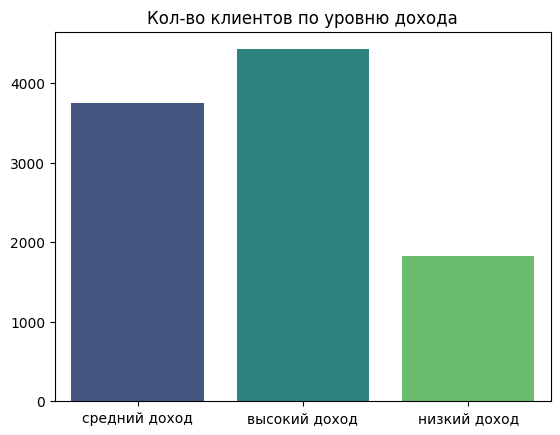

In [304]:
sns.countplot(x = 'salary_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов по уровню дохода')
plt.xlabel('')
plt.ylabel('')

In [305]:
# Связь дохода и ухода клиентов
pd.pivot_table(df,
               index= "Exited",
               columns = 'salary_category',
               values = 'CustomerId',
               aggfunc = [len])

len                           
salary_category высокий доход низкий доход средний доход
Exited                                                  
0                        3500         1448          3015
1                         928          375           734

В датасете в основном клиенты высокого и среднего достатка. Значительной зависимости ухода клиентов от уровня доходов не наблюдается.

**Категоризация по возрасту**

In [306]:
# Функция для категоризации данных по возрасту. 

def age_category(df):    
  if df['Age'] <= 30:
    return 'до 30 лет'
  elif df['Age'] <= 45:
    return '30-45 лет'
  elif df['Age'] <= 60:
    return '45-60 лет'     
  else:
    return 'старше 60 лет'

#добавил новый столбец в таблицу
df['age_category'] = df.apply(age_category, axis=1)

df.head(3)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,salary_category,age_category
0,15634602,215.0,Минск,Female,42,2,0.000000,1,1,1,2739.158919,1,средний доход,30-45 лет
1,15647311,206.0,Брест,Female,41,1,2265.077297,1,0,1,3041.691351,0,высокий доход,30-45 лет
2,15619304,122.0,Минск,Female,42,8,4315.156757,3,1,0,3079.231622,1,высокий доход,30-45 лет


In [307]:
df['age_category'].value_counts()

30-45 лет        5921
до 30 лет        1968
45-60 лет        1647
старше 60 лет     464
Name: age_category, dtype: int64

Text(0, 0.5, '')

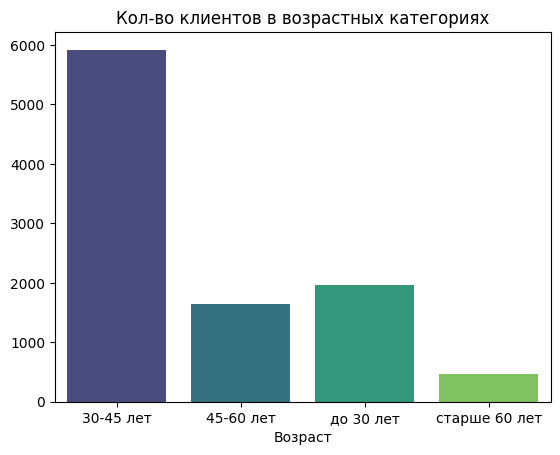

In [308]:
sns.countplot(x = 'age_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов в возрастных категориях')
plt.xlabel('Возраст')
plt.ylabel('')

In [309]:
# Связь дохода и уходя клиентов
pd.pivot_table(df,
               index= "Exited",
               columns = 'age_category',
               values = 'CustomerId',
               aggfunc = [len])

len                                  
age_category 30-45 лет 45-60 лет до 30 лет старше 60 лет
Exited                                                  
0                 4989       805      1820           349
1                  932       842       148           115

Больший отток наблюдается у клиентов в возрасте 30-45 лет - это самая многочисленная группа клиентов. Однако стоит обратить на категорию клиентов 45-60 лет, где процент оттока наивысший.

**Категоризация по уровню кредитного скоринга**





In [310]:
# Функция для категоризации данных по кредитному скорингу. 

def age_category(df):    
  if df['CreditScore'] <= 174:
    return 'низкий' #(F-D1)
  if df['CreditScore'] <= 249:
    return 'удовлетворительный' #(С3-С1)
  if df['CreditScore'] <= 324:
    return 'средний' #(B3-B1)
  else:
    return 'высокий'

#добавил новый столбец в таблицу
df['scoring_category'] = df.apply(age_category, axis=1)

df.head(3)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,salary_category,age_category,scoring_category
0,15634602,215.0,Минск,Female,42,2,0.000000,1,1,1,2739.158919,1,средний доход,30-45 лет,удовлетворительный
1,15647311,206.0,Брест,Female,41,1,2265.077297,1,0,1,3041.691351,0,высокий доход,30-45 лет,удовлетворительный
2,15619304,122.0,Минск,Female,42,8,4315.156757,3,1,0,3079.231622,1,высокий доход,30-45 лет,низкий


In [311]:
df['scoring_category'].value_counts()

удовлетворительный    3317
средний               3148
низкий                2065
высокий               1470
Name: scoring_category, dtype: int64

Text(0, 0.5, '')

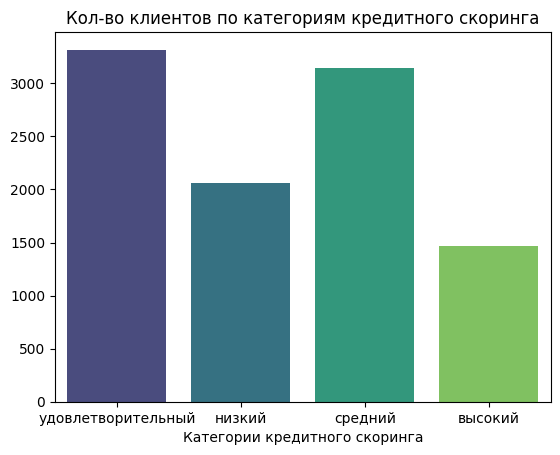

In [312]:
sns.countplot(x = 'scoring_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов по категориям кредитного скоринга')
plt.xlabel('Категории кредитного скоринга')
plt.ylabel('')

In [313]:
# Кореляция скоринга и оттока клиентов
pd.pivot_table(df,
               index= "Exited",
               columns = 'scoring_category',
               values = 'CustomerId',
               aggfunc = [len])

len                                  
scoring_category высокий низкий средний удовлетворительный
Exited                                                    
0                   1182   1601    2542               2638
1                    288    464     606                679

Большинство клиентов с удовлетворительным и средним кредитным скоринговым баллом. Доля ушедших клиентов с низким скоринговым баллом незначительно выше, чем в остальных категориях, это может свидетельствовать о сложности оформления кредитных сделок для таких клиентов.

**Категоризация по сумме остатков на счетах**

In [314]:
# Функция для категоризации данных по остаткам на счетах

def balance_category(df): 
  if df['Balance'] == 0:
    return '0'   
  if df['Balance'] <= 2000:
    return 'до 2 тыс руб.'   
  elif df['Balance'] <= 3000:
    return '2-4 тыс. руб.'   
  else:
    return 'более 4 тыс. руб.'

# Добавил новый столбец в таблицу
df['balance_category'] = df.apply(balance_category, axis=1)

df.head(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,salary_category,age_category,scoring_category,balance_category
0,15634602,215.0,Минск,Female,42,2,0.000000,1,1,1,2739.158919,1,средний доход,30-45 лет,удовлетворительный,0
1,15647311,206.0,Брест,Female,41,1,2265.077297,1,0,1,3041.691351,0,высокий доход,30-45 лет,удовлетворительный,2-4 тыс. руб.
2,15619304,122.0,Минск,Female,42,8,4315.156757,3,1,0,3079.231622,1,высокий доход,30-45 лет,низкий,более 4 тыс. руб.
3,15701354,279.0,Минск,Female,39,1,0.000000,2,0,0,2535.854865,0,средний доход,30-45 лет,средний,0
4,15737888,400.0,Брест,Female,43,2,3392.184324,1,1,1,2137.408108,0,средний доход,30-45 лет,высокий,более 4 тыс. руб.


In [315]:
df['balance_category'].value_counts()

более 4 тыс. руб.    3937
0                    3617
2-4 тыс. руб.        2047
до 2 тыс руб.         399
Name: balance_category, dtype: int64

Text(0, 0.5, '')

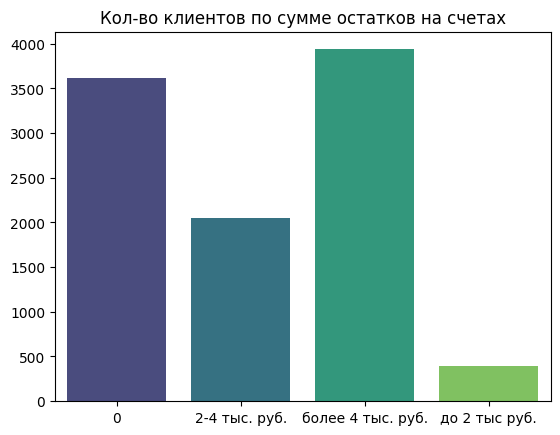

In [316]:
sns.countplot(x = 'balance_category', data = df, palette = 'viridis')
plt.title('Кол-во клиентов по сумме остатков на счетах')
plt.xlabel('')
plt.ylabel('')

In [317]:
pd.pivot_table(df,
               index= "Exited",
               columns = 'balance_category',
               values = 'CustomerId',
               aggfunc = [len])

len                                              
balance_category     0 2-4 тыс. руб. более 4 тыс. руб. до 2 тыс руб.
Exited                                                              
0                 3117          1584              2959           303
1                  500           463               978            96

В датасете клиенты с разными остатками на счетах. Как уже отмечалось ранее, большое количество клиентов с нулевыми остатками на счетах (возможно имеющие кредитные продукты), такие клиенты реже уходят из банка. Также большое количество клиентов с остатками более 4000 рублей. Больших выбросов в части оттока клиентов не наблюдается. 

**Выводы на основе имеющихся данных:**
1. В датасете больше клиентов с высоким и средним уровнем заработной платы. 
2. Самая многочисленная группа в разрезе по возрасту - клиенты  30-45 лет. Процент оттока больше всего у клиентов 45-60 лет.
3. Большинство клиентов с хорошим и средним кредитным скорингом. Доля ушедших клиентов с плохим кредитным рейтингом незначительно выше, чем в остальных категориях.
4. В датасете клиенты с разными остатками на счетах. Большое количество клиентов с нулевыми остатками на счетах. Также большое количество клиентов с остатками более 4000 рублей. Больших выбросов оттока клиентов не наблюдается. 

#**Исследовательский анализ данных (EDA)**

In [318]:
# Создаю копию датасета для проведения анализа

df_copy = df.copy()

In [319]:
# Заменяю категориальные значения на цифровые, что бы полноценно провести анализ датасета

df_copy['Gender'] = df_copy['Gender'].replace({'Female':0, 'Male': 1})
df_copy['Geography'] = df_copy['Geography'].replace({'Минск':0, 'Брест': 1, 'Могилев': 2})

df_copy.head(3)


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,salary_category,age_category,scoring_category,balance_category
0,15634602,215.0,0,0,42,2,0.000000,1,1,1,2739.158919,1,средний доход,30-45 лет,удовлетворительный,0
1,15647311,206.0,1,0,41,1,2265.077297,1,0,1,3041.691351,0,высокий доход,30-45 лет,удовлетворительный,2-4 тыс. руб.
2,15619304,122.0,0,0,42,8,4315.156757,3,1,0,3079.231622,1,высокий доход,30-45 лет,низкий,более 4 тыс. руб.


In [320]:
# Средние значения всех показателей, сгруппированных относительно целевой переменной

df_copy.groupby('Exited').agg('mean')


The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,
0,1.569117e+07,241.480975,0.684918,0.572523,37.408389,5.033279,1966.089102,1.544267,0.707146,0.554565,2695.632210
1,1.569005e+07,236.282278,1.001964,0.440844,44.837997,4.932744,2462.392955,1.475209,0.699067,0.360825,2742.315609


1. Кредитный рейтинг ушедших клиентов незначительно ниже, чем оставшихся.
2. Доля ушедших клиентов из Могилева значительная, что повлияло на средний показатель по столбцу "Geography".
3. Женский пол более склонен к уходу из банка, чем мужской
4. Возраст клиентов, которые ушли из банка, выше.
5. Остатки на счетах больше у клиентов, которые ушли из банка
6. Показатель активности клиента может быть важным, для определения возможного ухода клиента из банка. 

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


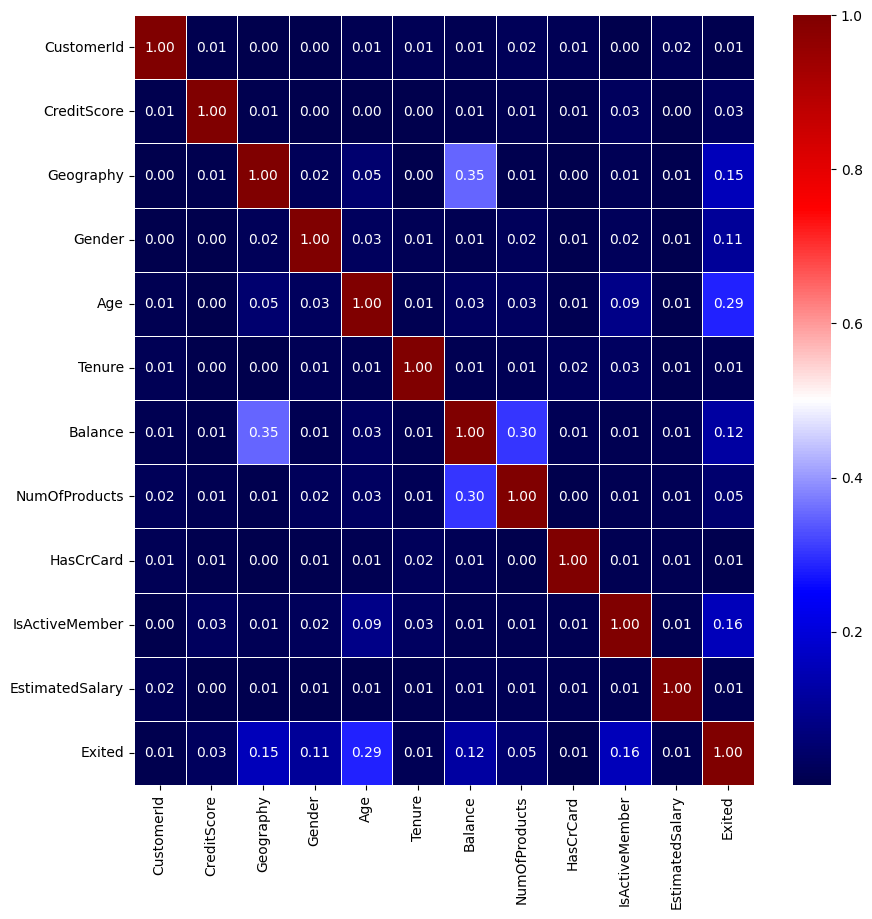

In [321]:
# корреляционный анализ

corr_df = df_copy.corr().abs()   
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df , annot = True, fmt = '0.2f', linewidths=.4, cmap="seismic")
plt.show()

1. Возраст, город  и активность клиента наиболее сильно влияют на целевую переменную "Exited".
2. Наименьшая кореляция у показателей: опыт работы, кредитный рейтинг, зарплата.
3. Остатки на счетах имеют среднюю кореляцию с городом и активностью клиента. 
4. Ни у одного показателя нету сильной зависимости к другому, таким образом удалять какие-либо столбцы для улучшения качества работы модели не требуется.

Самая большая кореляция целевого признака к показателям "Age", "Balance", "IsActiveMember" и "Geography", также посмотрим влияние EstimateSalary и NumOfProducts


**Остатки на счетах**

Text(0.5, 1.0, 'Остатки на счетах')

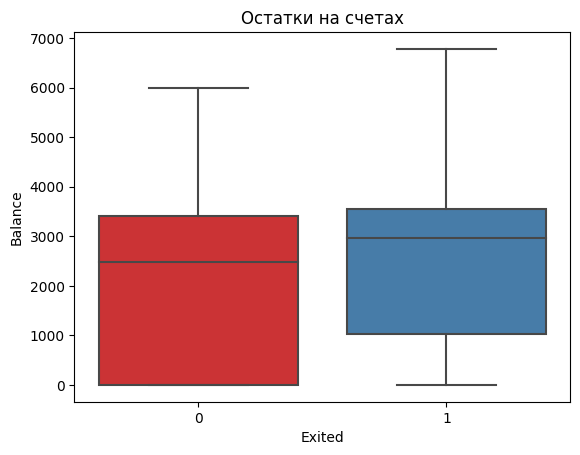

In [322]:
# Зависимость остатков на счетах 
sns.boxplot(x="Exited", y="Balance", data=df_copy, palette='Set1')
plt.title('Остатки на счетах')



Основная масса клиентов с отсутствием остатков на счетах являются клиентами банка. В среднем, у тех клиентов, которые ушли из банка, остатки на счетах выше.

Text(0.5, 1.0, 'Остатки на счетах')

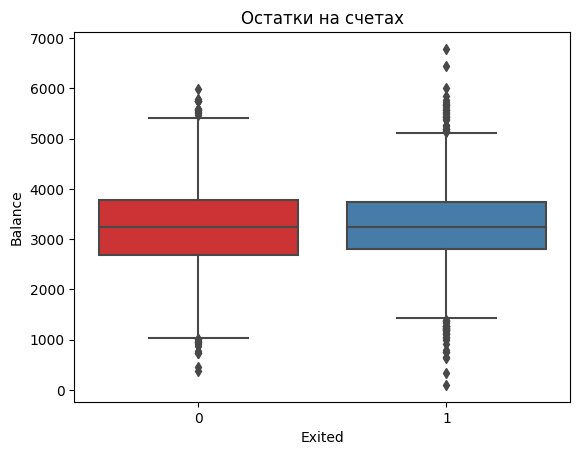

In [323]:
# Боксплот по показателю "Balance"
df_copy_balance = df_copy[df_copy['Balance'] > 0]

sns.boxplot(x="Exited", y="Balance", data=df_copy_balance, palette='Set1')
plt.title('Остатки на счетах')

Значительных различий по показателю "Balance" не наблюдается, если у клиентов есть остатки на счетах. Таким образом, можно сделать вывод, что клиенты без остатков на счетах чаще всего остаются в банке, а значит - это может быть значительным фактором при построении модели.

**Возраст**

Text(0.5, 1.0, 'Возраст')

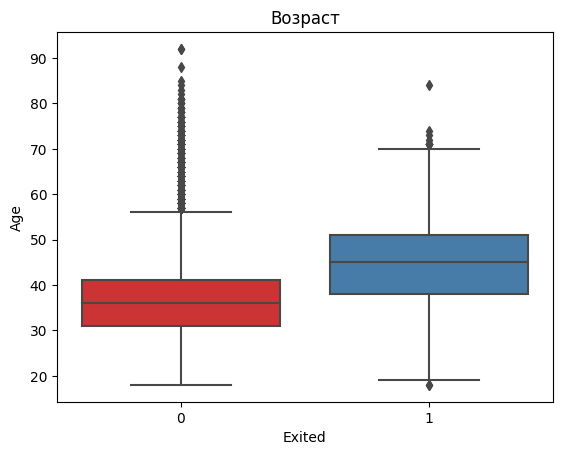

In [324]:
# Зависимость возраста 
sns.boxplot(x="Exited", y="Age", data=df_copy, palette='Set1')
plt.title('Возраст')





`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 1.0, 'Распределение возраста клиентов')

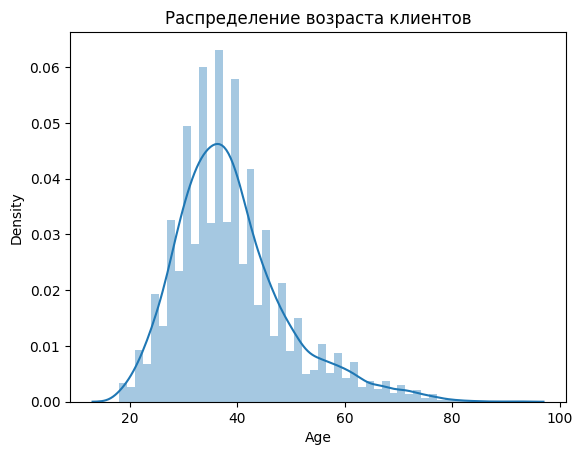

In [325]:
# Распределение возраста клиентов

sns_plot = sns.distplot(df['Age'])
fig = sns_plot.get_figure()
plt.title('Распределение возраста клиентов')

Как и было сказано ранее, средний возраст клиентов, которые ушли из банка, больше. При этом видно, что клиенты с очень большим возрастом остаются в банке (возможно люди пенсионного возраста намного реже уходят из банка). В целом, можно также сказать, что распределение по возрасту является нормальным. 
Таким образом, влияние такого фактора, как возраст, на уход из банков - значительное.

In [326]:
# для альтернативной модели создам два датасета без выбросов по целевой переменной "Exited" = 1 (для клиентов старше 60 лет).
# В одном датасете удалю строки, где большой выброс по возрасту для целевой переменной "Exited" = 1
# В другом датасете усредню показатель возраста по выбросам для целевой переменной "Exited" = 1 (средний возраст - 37.4)

df_age = df[((df['Age'] > 59) & (df['Exited'] == 0))]
df_age



,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,salary_category,age_category,scoring_category,balance_category
42,15687946,165.0,Минск,Female,61,2,3173.495946,1,1,1,2544.698108,0,средний доход,старше 60 лет,низкий,более 4 тыс. руб.
44,15684171,248.0,Брест,Female,61,5,4214.354324,1,1,1,4279.415946,0,высокий доход,старше 60 лет,удовлетворительный,более 4 тыс. руб.
85,15805254,242.0,Брест,Female,75,10,0.000000,2,1,1,3099.344595,0,высокий доход,старше 60 лет,удовлетворительный,0
158,15589975,237.0,Минск,Female,73,6,2628.628378,1,0,1,2830.261081,0,средний доход,старше 60 лет,удовлетворительный,2-4 тыс. руб.
181,15789669,128.0,Минск,Male,65,2,0.000000,2,1,1,1299.232703,0,средний доход,старше 60 лет,низкий,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9761,15736778,366.0,Могилев,Female,60,1,1971.583243,2,1,1,469.063784,0,низкий доход,45-60 лет,высокий,до 2 тыс руб.
9765,15777067,76.0,Минск,Male,64,2,3696.504595,1,0,1,1180.488108,0,средний доход,старше 60 лет,низкий,более 4 тыс. руб.
9894,15704795,137.0,Минск,Female,77,6,0.000000,2,1,1,1325.786486,0,средний доход,старше 60 лет,низкий,0
9897,15810563,262.0,Брест,Female,61,8,0.000000,2,1,1,4322.670811,0,высокий доход,старше 60 лет,средний,0


Записей с выбросом по возрасту 379 штук

In [327]:
df_age_new1 = df_copy.copy()
df_age_new2 = df_copy.copy()

df_age_new1.loc[(df_age_new1['Age'] > 59) & (df_age_new1['Exited'] == 0), 'Age'] = 37.4
df_age_new2 = df_age_new2[(((df['Age'] < 60 ) & (df_age_new2['Exited'] == 0)) | (df_age_new2['Exited'] == 1))]

Text(0.5, 1.0, 'Возраст')

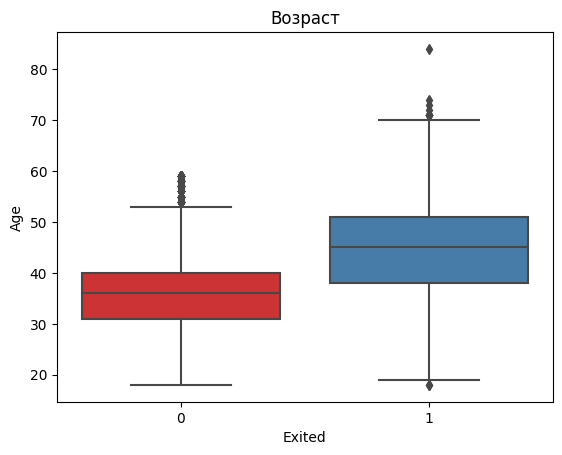

In [328]:
# Боксплот с усредненным возрастом
sns.boxplot(x="Exited", y="Age", data=df_age_new1, palette='Set1')
plt.title('Возраст')

Text(0.5, 1.0, 'Возраст')

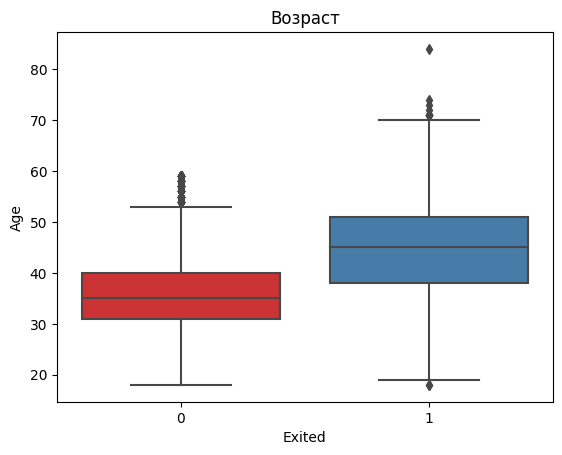

In [329]:
# Боксплот возраста с удаленными строками
sns.boxplot(x="Exited", y="Age", data=df_age_new2, palette='Set1')
plt.title('Возраст')

Мы избавились от выбросов и в дальнейшем это может повлиять на точность нашей модели.

**Активность клиента**

Text(0.5, 1.0, 'Активность клиента и целевая переменная')

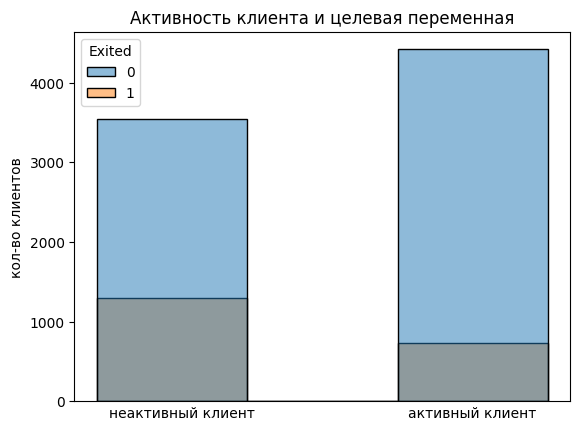

In [330]:
# Зависимость активности клиента 
sns.histplot(data=df, x="IsActiveMember",   binwidth=0.4, hue="Exited")
plt.xlabel('неактивный клиент                                   активный клиент')
plt.ylabel('кол-во клиентов')
plt.xticks([])
plt.title('Активность клиента и целевая переменная')


Наглядно можно увидеть, что активные клиенты менее склонны к уходу из банка

**Город**

Text(0.5, 1.0, 'Город и целевая переменная')

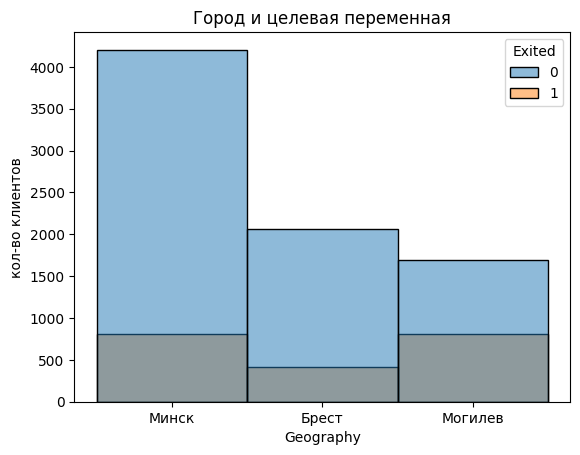

In [331]:
# Зависимость города
sns.histplot(data=df, x="Geography",   binwidth=0.4, hue="Exited")
plt.ylabel('кол-во клиентов')
plt.title('Город и целевая переменная')


Действительно, клиенты из Могилева чаще уходят из банка.

**Заработная плата**

Проанализируем заработную плату клиентов ее влияние на отток клиентов из банка.

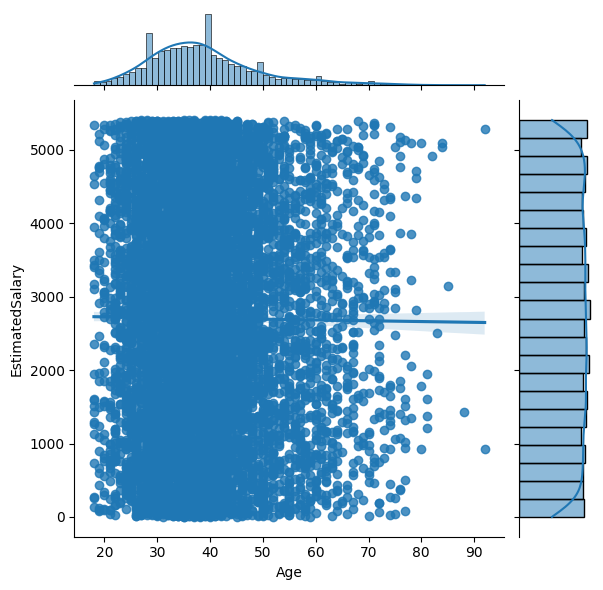

In [332]:
# Зависимость ЗП от возраста
sns.jointplot(x = 'Age', y = 'EstimatedSalary', data = df, kind = 'reg')

Text(0.5, 1.0, 'Заработная плата')

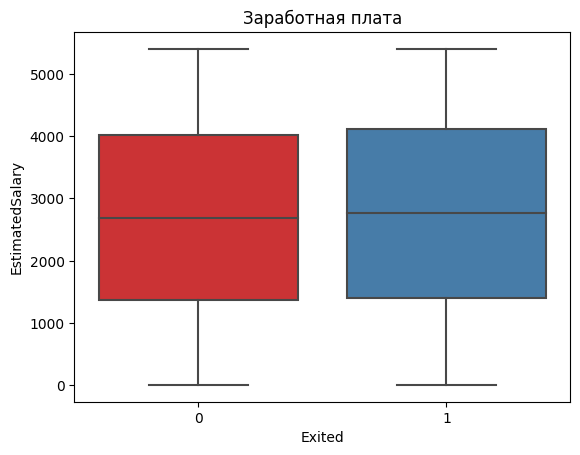

In [333]:
# Зависимость заработной платы

sns.boxplot(x="Exited", y="EstimatedSalary", data=df_copy, palette='Set1')
plt.title('Заработная плата')

Как видим из графика, заработная плата не сильно зависит от возраста клиента и в целом уровень дохода распределен равномерно. Можно предположить, что показатель заработной платы не является ключевым, для прогнозирование оттока клиентов.

**Количество продуктов у клиента**

Text(0.5, 1.0, 'Количество продуктов')

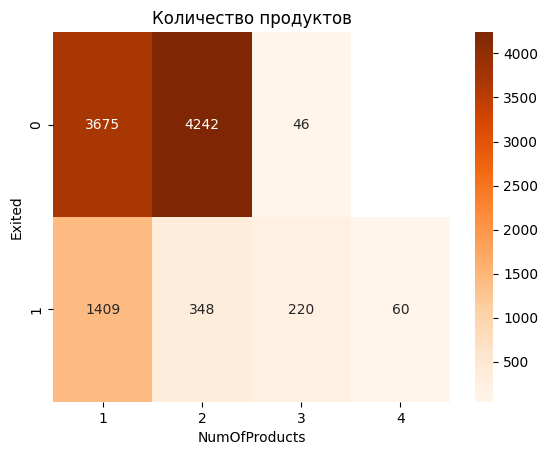

In [334]:
# Зависимость количества продуктов
pivot = df_copy.pivot_table(
    index=["Exited"],
    columns=["NumOfProducts"],
    values="CustomerId",
    aggfunc='count')
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Количество продуктов')


Интересно, что клиенты с 3 и 4 продуктами чаще уходят из банка, чем остаются. Это может являться аномалией в данном датасете. При этом очевидно, что, если у клиента всего один продукт - он также с большой вероятностью может уйти из банка.

**Вывод о предварительных признаках, которые могут повлиять на отток клиента, на основании анализа датасета**

**Признаки клиентов, которые склонны уходить в отток:**
Клиенты проживают в Могилеве


1. Клиенты чаще проживают в Могилеве.
2. Чаще это клиенты женского пола.
3. Клиенты среднего возраста (от 45 до 60 лет).
4. Неактивные клиенты
5. Клиенты могут иметь 3 или 4 продукта банка (в случае 4 продуктов это 100%-ый отток). Если у клиента 1 продукт, то также высока вероятность ухода клиента из банка.
6. На счету этих клиентов остаток ненулевой.
7. У клиентов, которые ушли из банка, хуже кредитный рейтинг.
8. В качестве альтернативных моделей сделал новые датасеты, которые учитывают выбросы по возрасту: с удаленными и усредненными значениями возраста. При построении модели сбалансирую их, относительно целевой переменной.

# **модель**

In [335]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [336]:
# удалим все ненужные данные
df_copy.drop('scoring_category', axis=1, inplace=True)
df_copy.drop('salary_category', axis=1, inplace=True)
df_copy.drop('age_category', axis=1, inplace=True)
df_copy.drop('balance_category', axis=1, inplace=True)

# Вернем корректные значения столбцу Geography
df_copy['Geography'] = df_copy['Geography'].replace({0:'Минск',  1:'Брест',  2:'Могилев'})
df_copy

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,215.0,Минск,0,42,2,0.000000,1,1,1,2739.158919,1
1,15647311,206.0,Брест,0,41,1,2265.077297,1,0,1,3041.691351,0
2,15619304,122.0,Минск,0,42,8,4315.156757,3,1,0,3079.231622,1
3,15701354,279.0,Минск,0,39,1,0.000000,2,0,0,2535.854865,0
4,15737888,400.0,Брест,0,43,2,3392.184324,1,1,1,2137.408108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,337.0,Минск,1,39,5,0.000000,2,1,0,2601.909189,0
9996,15569892,133.0,Минск,1,35,10,1550.530000,1,1,1,2748.642432,0
9997,15584532,287.0,Минск,0,36,7,0.000000,1,0,1,1137.448108,1
9998,15682355,338.0,Могилев,1,42,3,2029.062432,2,1,0,2510.500541,1


In [337]:
# для разделения выборки на test и train нам понадобиться train_test_split
from sklearn.model_selection import train_test_split

In [338]:
# разделим выборку на test valid и train
train_all, test = train_test_split(df_copy, test_size=0.2, random_state=42, stratify=df_copy['Exited'])
train, valid = train_test_split(train_all, test_size=0.25, random_state=42, stratify=train_all['Exited'])


In [339]:
x_col = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
y_col = ['Exited']

cat_features = ['Geography']

In [340]:
# 1. Базовый датафрейм содержит 10 000 значений и не сбалансирован относительно показателя Exited. 
# Будем применять метрику F1(среднее гармоническое метрик Precision и Recall), как более точную, т.к. метрика Accuracy не учитывает соотношения ложных срабатываний модели, что может быть критическим.
model1 = CatBoostClassifier(learning_rate=0.05,
                           eval_metric='F1', 
                           verbose=50,
                           cat_features=cat_features)


model1.fit(train[x_col],train[y_col],
          eval_set=(valid[x_col],valid[y_col]), verbose=50)

0:	learn: 0.5475216	test: 0.5295699	best: 0.5295699 (0)	total: 11.3ms	remaining: 11.3s
50:	learn: 0.5569620	test: 0.5100671	best: 0.5295699 (0)	total: 379ms	remaining: 7.06s
100:	learn: 0.5994723	test: 0.5422078	best: 0.5422078 (99)	total: 654ms	remaining: 5.82s
150:	learn: 0.6235781	test: 0.5605096	best: 0.5627981 (143)	total: 1.02s	remaining: 5.75s
200:	learn: 0.6452926	test: 0.5736677	best: 0.5763780 (188)	total: 1.34s	remaining: 5.33s
250:	learn: 0.6636546	test: 0.5705329	best: 0.5803432 (214)	total: 1.61s	remaining: 4.81s
300:	learn: 0.6832918	test: 0.5687500	best: 0.5803432 (214)	total: 1.88s	remaining: 4.37s
350:	learn: 0.7040715	test: 0.5660964	best: 0.5803432 (214)	total: 2.13s	remaining: 3.94s
400:	learn: 0.7211018	test: 0.5616225	best: 0.5803432 (214)	total: 2.39s	remaining: 3.57s
450:	learn: 0.7350929	test: 0.5602504	best: 0.5803432 (214)	total: 2.64s	remaining: 3.21s
500:	learn: 0.7527818	test: 0.5727554	best: 0.5803432 (214)	total: 3.05s	remaining: 3.04s
550:	learn: 0.765

In [341]:
# Метрика Accuracy  
model1 = CatBoostClassifier(learning_rate=0.05,
                           eval_metric='Accuracy', 
                           verbose=50,
                           cat_features=cat_features)


model1.fit(train[x_col],train[y_col],
          eval_set=(valid[x_col],valid[y_col]), verbose=50)

0:	learn: 0.8341667	test: 0.8250000	best: 0.8250000 (0)	total: 11.1ms	remaining: 11.1s
50:	learn: 0.8658333	test: 0.8540000	best: 0.8545000 (45)	total: 519ms	remaining: 9.66s
100:	learn: 0.8735000	test: 0.8590000	best: 0.8590000 (99)	total: 1.05s	remaining: 9.34s
150:	learn: 0.8786667	test: 0.8620000	best: 0.8625000 (143)	total: 1.33s	remaining: 7.51s
200:	learn: 0.8838333	test: 0.8640000	best: 0.8655000 (188)	total: 1.57s	remaining: 6.26s
250:	learn: 0.8883333	test: 0.8630000	best: 0.8655000 (188)	total: 1.84s	remaining: 5.49s
300:	learn: 0.8941667	test: 0.8620000	best: 0.8655000 (188)	total: 2.09s	remaining: 4.86s
350:	learn: 0.9006667	test: 0.8605000	best: 0.8655000 (188)	total: 2.35s	remaining: 4.34s
400:	learn: 0.9055000	test: 0.8595000	best: 0.8655000 (188)	total: 2.6s	remaining: 3.89s
450:	learn: 0.9096667	test: 0.8595000	best: 0.8655000 (188)	total: 2.84s	remaining: 3.46s
500:	learn: 0.9148333	test: 0.8620000	best: 0.8655000 (188)	total: 3.11s	remaining: 3.1s
550:	learn: 0.9186

Даже без проверки на тестовой версии очевидно, что модель требует доработки. Метрика Accuracy при несбалансированном датасете использовать не рекомендуется. Попробую улучшить значение результатов, изменяя гиперпараметры.

In [342]:
# Сбалансированные данные по покозателю Exited уже был подготовлен
new_df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,215.0,Минск,Female,42,2,0.000000,1,1,1,2739.158919,1
1,15647311,206.0,Брест,Female,41,1,2265.077297,1,0,1,3041.691351,0
2,15619304,122.0,Минск,Female,42,8,4315.156757,3,1,0,3079.231622,1
3,15701354,279.0,Минск,Female,39,1,0.000000,2,0,0,2535.854865,0
4,15737888,400.0,Брест,Female,43,2,3392.184324,1,1,1,2137.408108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,118.0,Могилев,Male,42,3,4109.181081,1,1,1,1444.464054,1
9982,15768163,244.0,Могилев,Female,46,7,3706.624865,1,1,0,3112.064865,1
9991,15769959,198.0,Минск,Female,53,4,2388.681351,1,1,0,1875.262432,1
9997,15584532,287.0,Минск,Female,36,7,0.000000,1,0,1,1137.448108,1


In [343]:
# поменяем значения гендеров на цифровые
new_df['Gender'] = new_df['Gender'].replace({'Female':0, 'Male': 1})

In [344]:
# Ранее уже была разработана логика для усреднения значений по возрасту для данных, которые вляются выбросом.
new_df.loc[(df_age_new1['Age'] > 59) & (df_age_new1['Exited'] == 0), 'Age'] = 37.4

In [345]:
# Так как у нас есть странные результат, связанные с количеством продуктов (клиенты с 3 и 4 продуктами склонны уходить из банка, что не является нормой)
# Заменим их значения на 1.5, с точки зрения корректности данных это будет верно, даже если ухудшит работу модели.
new_df.loc[(new_df['NumOfProducts'] > 2) , 'NumOfProducts'] = 1.5

new_df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,215.0,Минск,0,42.0,2,0.000000,1.0,1,1,2739.158919,1
1,15647311,206.0,Брест,0,41.0,1,2265.077297,1.0,0,1,3041.691351,0
2,15619304,122.0,Минск,0,42.0,8,4315.156757,1.5,1,0,3079.231622,1
3,15701354,279.0,Минск,0,39.0,1,0.000000,2.0,0,0,2535.854865,0
4,15737888,400.0,Брест,0,43.0,2,3392.184324,1.0,1,1,2137.408108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,118.0,Могилев,1,42.0,3,4109.181081,1.0,1,1,1444.464054,1
9982,15768163,244.0,Могилев,0,46.0,7,3706.624865,1.0,1,0,3112.064865,1
9991,15769959,198.0,Минск,0,53.0,4,2388.681351,1.0,1,0,1875.262432,1
9997,15584532,287.0,Минск,0,36.0,7,0.000000,1.0,0,1,1137.448108,1


In [346]:
# разделим выборку на test valid и train
train_all, test = train_test_split(new_df, test_size=0.2, random_state=42, stratify=new_df['Exited'])
train, valid = train_test_split(train_all, test_size=0.25, random_state=42, stratify=train_all['Exited'])




In [347]:
x_col = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
y_col = ['Exited']

cat_features = ['Geography']

In [348]:
# Сделаем новую модель (учитываются выбросы по возросту и количеству продуктов)

modelF1 = CatBoostClassifier(iterations = 951,
                           depth=8,
                           learning_rate=0.05,
                           eval_metric='F1', 
                           verbose=50,
                           rsm = 0.8,
                           metric_period=50,
                           l2_leaf_reg=2,
                           random_seed=42,
                           grow_policy='Lossguide',
                           cat_features=cat_features)


modelF1.fit(train[x_col],train[y_col],
          eval_set=(valid[x_col],valid[y_col]), verbose=50)

0:	learn: 0.7466375	test: 0.7360423	best: 0.7360423 (0)	total: 11.2ms	remaining: 10.7s
50:	learn: 0.8160099	test: 0.7815365	best: 0.7815365 (50)	total: 910ms	remaining: 16.1s
100:	learn: 0.8284380	test: 0.7875713	best: 0.7875713 (100)	total: 2.02s	remaining: 17s
150:	learn: 0.8454056	test: 0.7973485	best: 0.7973485 (150)	total: 3.52s	remaining: 18.7s
200:	learn: 0.8646647	test: 0.8107769	best: 0.8107769 (200)	total: 4.88s	remaining: 18.2s
250:	learn: 0.8890249	test: 0.8310078	best: 0.8310078 (250)	total: 5.87s	remaining: 16.4s
300:	learn: 0.9095718	test: 0.8462963	best: 0.8462963 (300)	total: 7.01s	remaining: 15.1s
350:	learn: 0.9261704	test: 0.8547794	best: 0.8547794 (350)	total: 7.99s	remaining: 13.7s
400:	learn: 0.9382992	test: 0.8631515	best: 0.8631515 (400)	total: 9.05s	remaining: 12.4s
450:	learn: 0.9491525	test: 0.8678788	best: 0.8678788 (450)	total: 10.1s	remaining: 11.2s
500:	learn: 0.9597084	test: 0.8816817	best: 0.8816817 (500)	total: 11.3s	remaining: 10.1s
550:	learn: 0.968

In [349]:
modelAUC = CatBoostClassifier(iterations = 999,
                           depth=8,
                           learning_rate=0.05,
                           eval_metric='AUC', 
                           verbose=50,
                           rsm = 0.8,
                           metric_period=50,
                           l2_leaf_reg=2,
                           random_seed=42,
                           grow_policy='Lossguide',
                           cat_features=cat_features)


modelAUC.fit(train[x_col],train[y_col],
          eval_set=(valid[x_col],valid[y_col]), verbose=50)

0:	test: 0.8016122	best: 0.8016122 (0)	total: 38.2ms	remaining: 38.1s
50:	test: 0.8683895	best: 0.8683895 (50)	total: 983ms	remaining: 18.3s
100:	test: 0.8795908	best: 0.8795908 (100)	total: 2.15s	remaining: 19.1s
150:	test: 0.8888969	best: 0.8888969 (150)	total: 3.13s	remaining: 17.6s
200:	test: 0.8980894	best: 0.8980894 (200)	total: 3.7s	remaining: 14.7s
250:	test: 0.9087308	best: 0.9087308 (250)	total: 4.19s	remaining: 12.5s
300:	test: 0.9177644	best: 0.9177644 (300)	total: 4.91s	remaining: 11.4s
350:	test: 0.9243368	best: 0.9243368 (350)	total: 5.84s	remaining: 10.8s
400:	test: 0.9300251	best: 0.9300251 (400)	total: 6.56s	remaining: 9.78s
450:	test: 0.9354541	best: 0.9354541 (450)	total: 7.01s	remaining: 8.52s
500:	test: 0.9395274	best: 0.9395274 (500)	total: 7.46s	remaining: 7.42s
550:	test: 0.9433583	best: 0.9433583 (550)	total: 7.92s	remaining: 6.44s
600:	test: 0.9462057	best: 0.9462057 (600)	total: 8.4s	remaining: 5.56s
650:	test: 0.9492732	best: 0.9492732 (650)	total: 8.86s	re

Результат уже выше 90% и при F1 и при AUC - это может говорить о улучшнии качества модели. При этом и на train и на valid результаты выше 90%.

Визуализируем модель

In [350]:
from catboost import Pool
from catboost.utils import get_roc_curve

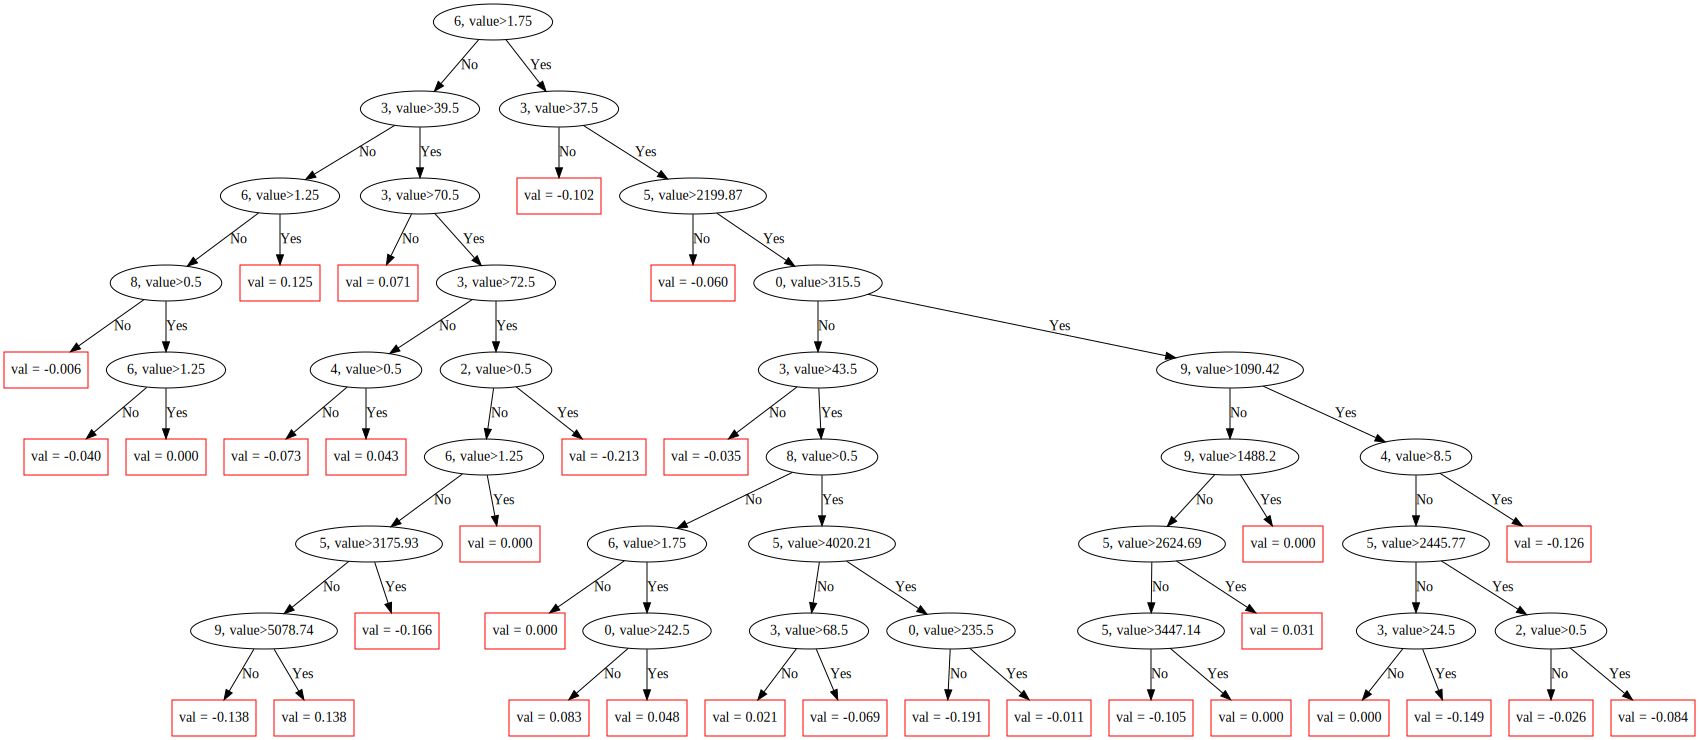

In [351]:
modelF1.plot_tree(tree_idx = 0)


Визуализация деревьев plot_tree полезна, но не дает наглядного представленияо модели

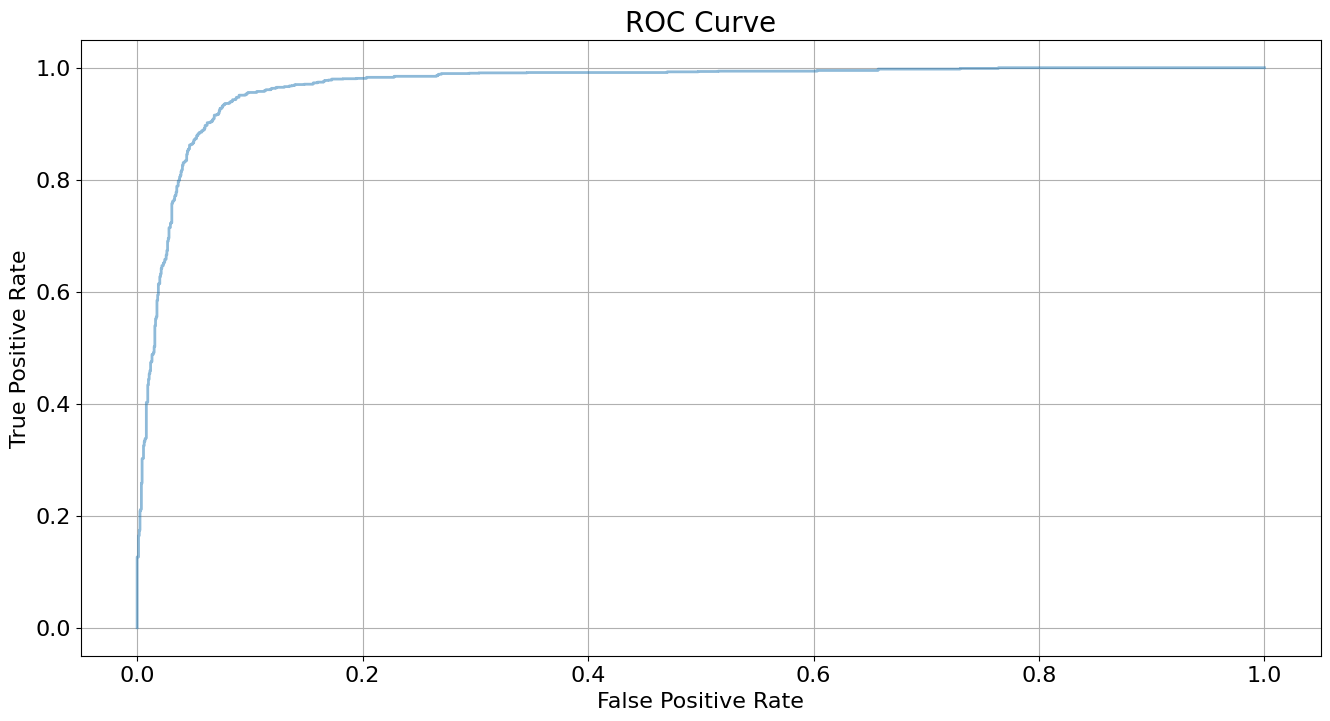

(array([0.        , 0.        , 0.        , ..., 0.99874451, 0.99937225,
        1.        ]),
 array([0.00000000e+00, 6.13496933e-04, 1.84049080e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.00000000e+00, 9.99813131e-01, 9.99764798e-01, ...,
        4.71964109e-04, 3.22039691e-04, 0.00000000e+00]))

In [352]:
catboost_pool = Pool(test[x_col], test[y_col], cat_features=cat_features)


get_roc_curve(modelAUC, 
              catboost_pool,
              thread_count=2,
              plot=True)

Можем увидеть как модель ведет себя уже на тестовых данных на графике Roc curve.

**Признаки, влияющие на модель**




In [353]:
fich = pd.DataFrame({'feature':x_col,'fich':modelF1.feature_importances_})


In [354]:
fich.sort_values('fich',ascending=False)

,feature,fich
3,Age,22.544808
6,NumOfProducts,17.721948
0,CreditScore,14.509436
5,Balance,14.331369
9,EstimatedSalary,13.288229
4,Tenure,5.828259
1,Geography,4.651745
8,IsActiveMember,4.002387
2,Gender,2.102509
7,HasCrCard,1.019312


In [355]:
#Для визуализации установлю shap

!pip install shap

import xgboost
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [356]:
shap.initjs()
explainer = shap.TreeExplainer(modelF1)
shap_values = explainer.shap_values(train[x_col])

shap.force_plot(explainer.expected_value, shap_values[0,:], train[x_col].iloc[0,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


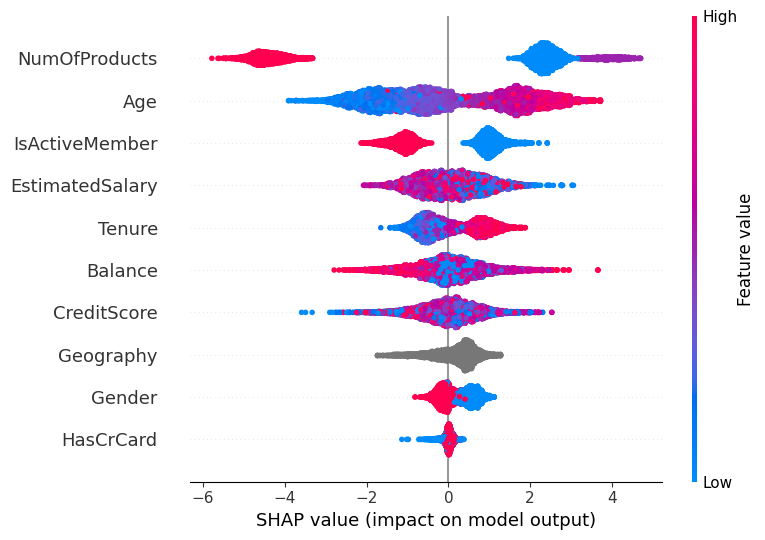

In [357]:
shap.summary_plot(shap_values, train[x_col])

Большое влияние на модель оказывают клиенты с низким кредитным скорингом, также сильное влияние оказывает Пол клиента и количество продуктов (тут надо отметить, что клиенты с 1 продуктом в зоне риска для банка). Чем выше возраст, тем вероятнее клиент склонен к уходу из банка. 
Клиенты же, которые остаются в банке чаще всего проживают в Минске, возрастом до 40 лет и имеют более 1 продукта.

# **Проверка модели**

Матрица ошибок и классификационный отчет

In [358]:
from sklearn.metrics import confusion_matrix

In [359]:
# для матрицы ошибок преобразуем переменные TRAIN
y_train_pred =  modelF1.predict_proba(train[x_col])[:, 1]
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_pred_df = round(y_train_pred_df)

In [360]:
y_train_true_df = train[y_col]

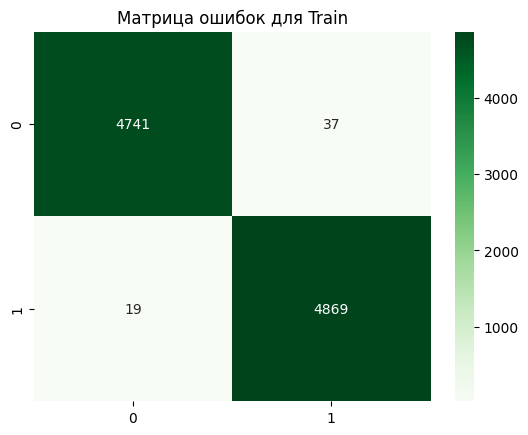

In [361]:
cnf_matrix  = confusion_matrix(y_train_true_df, y_train_pred_df)
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Матрица ошибок для Train",fontsize=12)
#plt.savefig("visual_numpy_array_train.png", bbox_inches='tight', dpi=100)
plt.show()

In [362]:
# для матрицы ошибок преобразуем переменные Valid
y_valid_pred =  modelF1.predict_proba(valid[x_col])[:, 1]
y_valid_pred_df = pd.DataFrame(y_valid_pred)
y_valid_pred_df = round(y_valid_pred_df)

In [363]:
y_valid_true_df = valid[y_col]

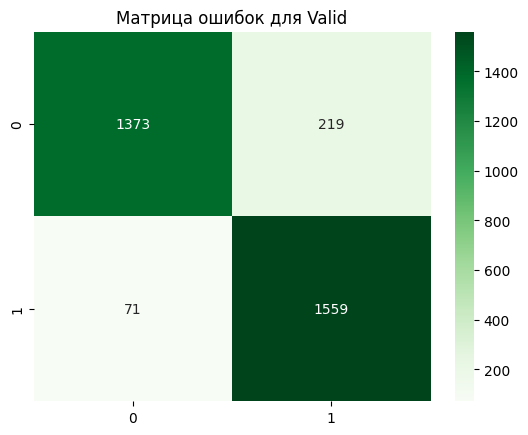

In [364]:
cnf_matrix  = confusion_matrix(y_valid_true_df, y_valid_pred_df)
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Матрица ошибок для Valid",fontsize=12)
#plt.savefig("visual_numpy_array_test.png", bbox_inches='tight', dpi=100)
plt.show()

In [365]:
# для матрицы ошибок преобразуем переменные TEST
y_test_pred =  modelF1.predict_proba(test[x_col])[:, 1]
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = round(y_test_pred_df)

In [366]:
y_test_true_df = test[y_col]

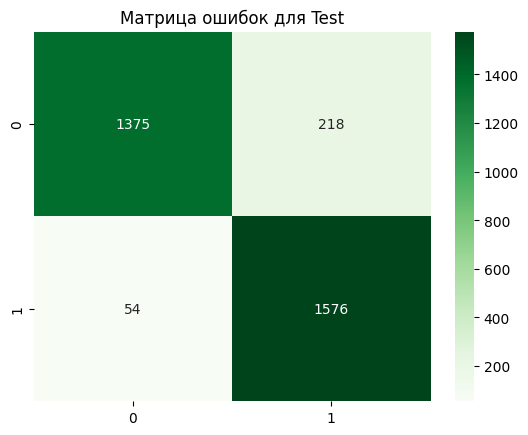

In [367]:
cnf_matrix  = confusion_matrix(y_test_true_df, y_test_pred_df)
sns.heatmap(cnf_matrix, annot=True, fmt="d" , cmap="Greens")
plt.title("Матрица ошибок для Test",fontsize=12)
#plt.savefig("visual_numpy_array_test.png", bbox_inches='tight', dpi=100)
plt.show()

Распределение на выборках Train, Test  и Valid однородно. Можно сделать вывод, что модель не переобучена и дает похожие результаты на всех выборках. Но надо заметить, что FP клиентов больше, чем FN.

Построю классификационный отчет, показатель оценки эффективност модели. 

In [368]:
from sklearn.metrics import classification_report
print(classification_report(y_test_true_df, y_test_pred_df))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1593
           1       0.88      0.97      0.92      1630

    accuracy                           0.92      3223
   macro avg       0.92      0.92      0.92      3223
weighted avg       0.92      0.92      0.92      3223



Метрики на test более 85 %, что является удовлетворительным результатом.

Проверим данные на тесте, добавим вероятность ухода в датафрейм

In [369]:
predictions = modelF1.predict_proba(test[x_col])[:, 1]
print(f"Predictions: {predictions}")


Predictions: [0.97749031 0.95733636 0.11334596 ... 0.92087091 0.81061211 0.98028198]


In [370]:
predictions =  pd.DataFrame(predictions)



In [374]:
test.reset_index(drop=True, inplace=True)


In [375]:
df_out = pd.merge(test,predictions,how = 'left',left_index = True, right_index = True)


In [376]:
df_out[['CustomerId' , 'Exited', 0]]

,CustomerId,Exited,0
0,15656822,1,0.977490
1,15669899,1,0.957336
2,15777904,0,0.113346
3,15673020,1,0.959298
4,15737071,1,0.862698
...,...,...,...
3218,15609735,1,0.926908
3219,15781589,0,0.027715
3220,15780909,1,0.920871
3221,15782364,0,0.810612


# **Пример**

In [377]:
# попробую на основаниимоели создать нового клиента и посмотрю на результат
submission = np.array([[500, 'Минск', 1, 2, 1, 2000, 4, 0, 1, 0], [120, 'Могилев', 0, 50, 0, 4, 1, 0, 1, 0], [118, 'Могилев', 0, 52, 3, 2000, 2, 1, 0, 2500]])
predictions = modelF1.predict_proba(submission)[:, 1]
print(f"Predictions: {predictions}")


Predictions: [0.00110935 0.83536728 0.97162345]


In [378]:
# Мини приложение

submission = np.array([[int(input('Введите кредитный рейтинг от 0 до 400 - ')), 
                        input('Напишите город Минск, Брест или Могилев - '), 
                        int(input('Пол: 1 - мужчина, 0 - женщина - ')), 
                        int(input('Возраст - ')), 
                        int(input('Количество лет в банке - ')), 
                        float(input('Остаток на счете - ')), 
                        int(input('Количество продуктов: 1 - только один продукт, 2 - больше одного - ')), 
                        int(input('Есть ли кредитная карта: 1 - есть, 0 - нет - ')),  
                        int(input('Активный клиент: 1 - да, 0 - нет - ')), 
                        float(input('Средня зарплата - '))]])
predictions = modelF1.predict_proba(submission)[:, 1]
print(f"Вероятность ухода: {predictions * 100} %")

Введите кредитный рейтинг от 0 до 400 - 200
Напишите город Минск, Брест или Могилев - Могилев
Пол: 1 - мужчина, 0 - женщина - 0
Возраст - 45
Количество лет в банке - 25
Остаток на счете - 2000
Количество продуктов: 1 - только один продукт, 2 - больше одного - 1
Есть ли кредитная карта: 1 - есть, 0 - нет - 0
Активный клиент: 1 - да, 0 - нет - 0
Средня зарплата - 2500
Вероятность ухода: [89.95672899] %


# **Вывод**

**Данные:**
1. В датасете 10 000 записей. Все записи уникальные и все значения в датасете заполненны. Мужчин незначительно больше, чем женщин (мужчин 5457, женщин 4543). Клиенты из 3 городов (Минск - 5014 , Могилев - 2509 , Брест - 2477).
2. Наиболее частый отток наблюдается у клиентов из Могилева. Женщины уходят из банка чаще мужчин.
3. Более половины клиентов имеют всего один продукт в банке. Необходимо дорабатывать в части допродаж клиентам банка.
5. В датасете больше клиентов с высоким и средним уровнем заработной платы. 
6. Самая многочисленная группа в разрезе по возрасту - клиенты  30-45 лет, однако есть выброс (клиенты с очень большим возрастом лояльны к банку - 379 записей).
7. Большинство клиентов с хорошим и средним кредитным скорингом.
8. В датасете клиенты с разными остатками на счетах. Большое количество клиентов с нулевыми остатками. Также большое количество клиентов с остатками более 4000 рублей. Больших выбросов оттока клиентов не наблюдается. 
9. Выборка несбалансированная. Ушедших клиентов значительно меньше, чем оставшихся в банке (80% лояльных и 20% ушедших в отток). 



**Сбалансирование датасета для модели:**
1. Увеличил количество клиентов, которые ушли из банка, путем создания дубликатов записей, тем самым сбалансировав датасет.
2. Ликвидировал выброс по возрасту - усреднил возраст по записям, где клиенты старше 60 лет. Таким образом, показатель возраста не искажает данные в датасете.
3. В датасете большинство клиентов с 3 и 4 продуктами ушли из банка. Т.к. это аномальное явления для банка (все таки, клиенты с большиим количеством продуктов более лояльны к банку в целом), то таким клиентам установил кол-во продуктов - 1,5. 

**Признаки клиентов, которые склонны уходить в отток:**
1. Клиенты проживают в Могилеве.
2. Чаще это женщины.
3. Клиенты среднего возраста (от 45 до 60 лет).
4. Неактивные клиенты
5. Если у клиента 1 продукт, то высока вероятность ухода клиента из банка.
6. У клиентов, которые ушли из банка, хуже кредитный рейтинг.

**Признаки клиентов, которые не склонны уходить в отток:**
1. Клиенты проживают в Минске.
2. Чаще это мужчины.
3. Клиенты ниже среднего возраста (до 40 лет).
4. Клиенты активные.
5. Клиенты имеют больше 1 продукта банка.
6. На счету этих клиентов может быть нулевой остаток.
7. У клиентов, высокий кредитный рейтинг.

В рамках анализа были построены модели прогнозирования оттока клиентов. Данные модели позволят с вероятностью 80% прогнозировать отток среди существующих и новых клиентов, что позволит принять меры по удержанию конкретных клиентов в будущем.

**Рекомендации:**
1. Важно обратить внимание на клиентов с 1 продуктом. Данный показатель является одним из ключевых. Существует явная недоработка банка в рамках допродажи данным клиентам дополнительных услуг.
2. Могилев - город, где отток клиентов максимальный. Необходимо изучить данную тенденцию (ушли организации на обслуживание в другой банк? закрылись филиалы в регионе? появился новый банк конкурент?)
3. Более возрастные клиента склонны к уходу из банка. Необходимо проанализировать, что их вынуждает покинуть банк.
4. Клиенты с высокими остатками на счетах уходят чаще. Данных клиентов нао проанализировать и понять причину оттока. Возможно к таким клиентам требуется индивидуальный подход (высокие остатки на счетах могут говорить, что данные клиенты являются премиальными).
5. Если клиент становится неактивным, то его следует обязательно выделять в СРМ кампании или дополнительно анализировать.